# Programa de la solución de las trayectorias cuánticas para el sistema de 3 niveles.
## Distrubución de tiempos de espera

In [4]:
import qutip 
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pylab import *

In [5]:
NF=3
Kg = basis(NF,2)
Ka = basis(NF,1)
Ke = basis(NF,0)

# Estado base
psi0 = Kg 

Aaa = Ka*Ka.dag()
Aee = Ke*Ke.dag()
Agg = Kg*Kg.dag()
Aeg = Ke*Kg.dag()
Aag = Ka*Kg.dag()
Aea = Ke*Ka.dag()
Aae = Ka*Ke.dag()
Aga = Kg*Ka.dag()
Age = Kg*Ke.dag()

#Valores esperados
ket_a = Aaa #Definiendo los valores esperados con la diagonal principal
ket_e = Aee
ket_g = Agg

expect_values = [Aaa,
Aee,
Agg] #Los valores esperados se ponen en forma de lista, no se si importe su orden

Omega = 3.5 #Frecuencia de rabi
Delta = 0 #Desintonia
ga = 0.015 
gd = 0.05
g = 0.95



#El numero de trayectorias necesarias para ver periodos brillantes y obscuros tiene que ser 1 
#De lo contrario como ensamble no se ve porque en el mismo coinciden periodos brillantes con los obscuros de otros 
#Esta parpadeo es caracteristico de puntos cuanticos, átomos y algunas moleculas 

# Operadores de colapso
Ceg = np.sqrt(g)*Age 
Cea = np.sqrt(gd)*Aae
Cag = np.sqrt(ga)*Aga
collapse = [Ceg ,Cea, Cag] #Ceg colapso 0, Cea colapso 1, Cag colapso 2

#Hamiltoniano del sistema, no se le añaden los terminos de los colapsos porque el programa de la solucion de montecarlo
#lo hace en automatico  con la funcion de liuvillian(H)
H = Delta * Aee + 0.5 * Omega * (Aeg + Age)



In [4]:
deltat=10000
tlist = np.linspace(0,1000,deltat)
MC1 = mcsolve(H, psi0, tlist, collapse, expect_values, 10,
             options={'num_cpus': 6})  # Pasar las opciones como diccionario
#La funcion MC para resolver las trayectorias, H es el hamiltoniano, psi0 son las condiciones iniciales.
#tlist es el tiempo con delta t dependiendo de la funcion linspace, collapse los operadores de colapso, expect_values los 
#valores esperados y ntraj el numero de trayectorias.

10.0%. Run time:   0.00s. Est. time left: 00:00:00:00
20.0%. Run time:   2.69s. Est. time left: 00:00:00:10
30.0%. Run time:   5.22s. Est. time left: 00:00:00:12
40.0%. Run time:   7.50s. Est. time left: 00:00:00:11
50.0%. Run time:  10.25s. Est. time left: 00:00:00:10
60.0%. Run time:  12.83s. Est. time left: 00:00:00:08
70.0%. Run time:  15.70s. Est. time left: 00:00:00:06
80.0%. Run time:  18.09s. Est. time left: 00:00:00:04
90.0%. Run time:  20.63s. Est. time left: 00:00:00:02
100.0%. Run time:  23.45s. Est. time left: 00:00:00:00
Total run time:  26.33s


In [5]:
jump_times = MC1.col_times[0]  # tiempos de colapso
waiting_times = np.diff(jump_times)  # diferencias entre tiempos consecutivos


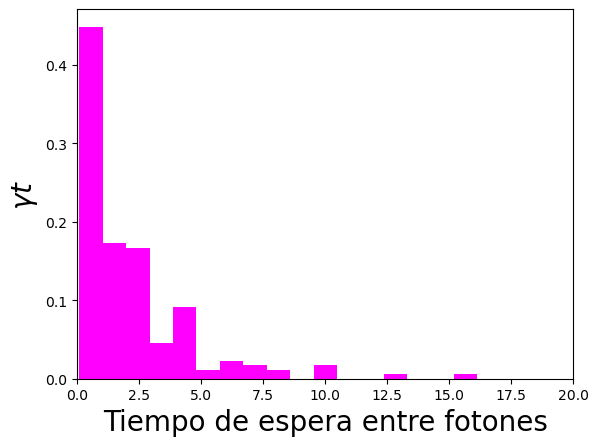

In [7]:
plt.hist(waiting_times, bins=200, density=True,color="magenta")
plt.xlabel('Tiempo de espera entre fotones',fontsize=20)
plt.ylabel(r'$\gamma t$',fontsize=20)
plt.xlim(0,20)
plt.show()

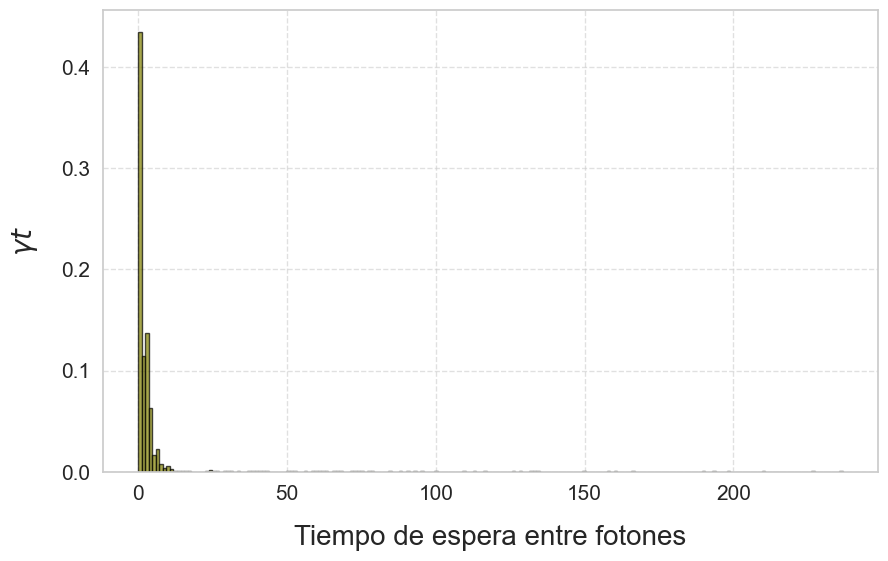

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer un estilo más moderno
sns.set(style="whitegrid")

# Crear el histograma con más ajustes visuales
plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura
plt.hist(waiting_times, bins=200, density=True, color="olive", edgecolor='black', alpha=0.7)

# Etiquetas de los ejes con mayor tamaño de fuente
plt.xlabel('Tiempo de espera entre fotones', fontsize=20, labelpad=15)
plt.ylabel(r'$\gamma t$', fontsize=20, labelpad=15)

# Limitar el rango del eje y
#plt.ylim(0, 0.05)

# Personalizar la apariencia de los ejes
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Añadir rejilla con líneas suaves
plt.grid(True, linestyle='--', alpha=0.6)

# Mostrar el gráfico
plt.show()


In [ ]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt

NF = 3
Kg = basis(NF, 2)
Ka = basis(NF, 1)
Ke = basis(NF, 0)

# Estado inicial
psi0 = Kg 

# Definición de operadores de colapso y Hamiltoniano
Aaa = Ka*Ka.dag()
Aee = Ke*Ke.dag()
Agg = Kg*Kg.dag()
Aeg = Ke*Kg.dag()
Aag = Ka*Kg.dag()
Aea = Ke*Ka.dag()
Aae = Ka*Ke.dag()
Aga = Kg*Ka.dag()
Age = Kg*Ke.dag()

Omega = 3.5  # Frecuencia de Rabi
Delta = 0    # Desintonía
ga = 0.015 
gd = 0.05
g = 1


10.0%. Run time: 580.92s. Est. time left: 00:01:27:08
20.0%. Run time: 1156.62s. Est. time left: 00:01:17:06
30.0%. Run time: 1734.31s. Est. time left: 00:01:07:26
40.0%. Run time: 2312.68s. Est. time left: 00:00:57:49
50.0%. Run time: 2887.47s. Est. time left: 00:00:48:07
60.0%. Run time: 3466.90s. Est. time left: 00:00:38:31
70.0%. Run time: 4045.47s. Est. time left: 00:00:28:53
80.0%. Run time: 4622.55s. Est. time left: 00:00:19:15
90.0%. Run time: 5199.79s. Est. time left: 00:00:09:37
100.0%. Run time: 5777.18s. Est. time left: 00:00:00:00
Total run time: 5778.45s
El primer colapso ocurrió en t = 4.92


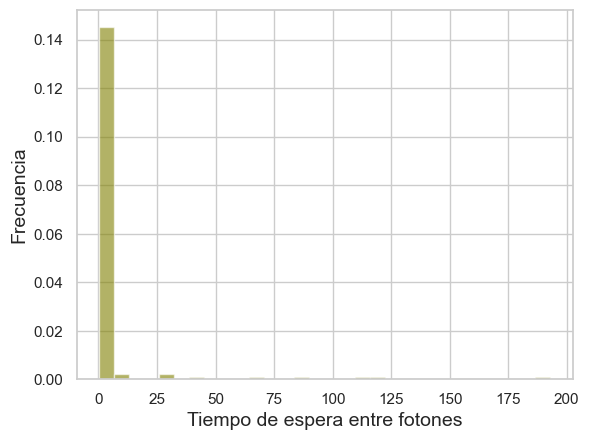

In [116]:

# Operadores de colapso
Ceg = np.sqrt(g) * Age
Cea = np.sqrt(gd) * Aae
Cag = np.sqrt(ga) * Aga
collapse = [Ceg, Cea, Cag]

# Hamiltoniano
H = Delta * Aee + 0.5 * Omega * (Aeg + Age)

# Definir el tiempo de la simulación con alta resolución temporal
tlist = np.linspace(0, 1000, 10000)  # Muy alta resolución temporal

# Resolver la ecuación usando Monte Carlo, solo 1 trayectoria
MC_result = mcsolve(H, psi0, tlist, collapse, [Aaa, Aee, Agg], ntraj=5000, options=Options(nsteps=100000))

# Obtener los tiempos de colapso
collapse_times = MC_result.col_times[0]  # La primera trayectoria

# Verificar si hubo colapsos y registrar el tiempo del primer colapso
if len(collapse_times) > 0:
    first_collapse_time = collapse_times[0]
    print(f"El primer colapso ocurrió en t = {first_collapse_time:.2f}")
else:
    print("No hubo colapsos durante la simulación.")

# Para visualizar el tiempo de espera entre colapsos (solo si hubiera más)
if len(collapse_times) > 1:
    waiting_times = np.diff(collapse_times)
    plt.hist(waiting_times, bins=30, density=True, alpha=0.6, color='olive')
    plt.xlabel("Tiempo de espera entre fotones", fontsize=14)
    plt.ylabel("Frecuencia", fontsize=14)
    plt.show()


In [12]:
all_collapse_times = []
for traj in MC_result.col_times:
    if len(traj) > 0:
        all_collapse_times.append(traj[0])  # Solo tomamos el primer colapso de cada trayectoria

# Analiza los tiempos de espera del primer colapso
plt.hist(all_collapse_times, bins=100, density=True, alpha=0.6, color='blue')

plt.xlabel(r"$\gamma \tau$", fontsize=14)
plt.ylabel("\gamma tau", fontsize=14)
plt.show()

<>:10: SyntaxWarning: invalid escape sequence '\g'
<>:10: SyntaxWarning: invalid escape sequence '\g'
C:\Users\kevma\AppData\Local\Temp\ipykernel_23448\1175861231.py:10: SyntaxWarning: invalid escape sequence '\g'
  plt.ylabel("\gamma tau", fontsize=14)
C:\Users\kevma\AppData\Local\Temp\ipykernel_23448\1175861231.py:10: SyntaxWarning: invalid escape sequence '\g'
  plt.ylabel("\gamma tau", fontsize=14)


NameError: name 'MC_result' is not defined

In [122]:
import pandas as pd

# Convertir los tiempos de colapso en un DataFrame
df = pd.DataFrame(all_collapse_times, columns=['Tiempo de colapso'])

# Guardar el DataFrame en un archivo CSV
df.to_csv('collapse_times.csv', index=False)


19.44034282068874


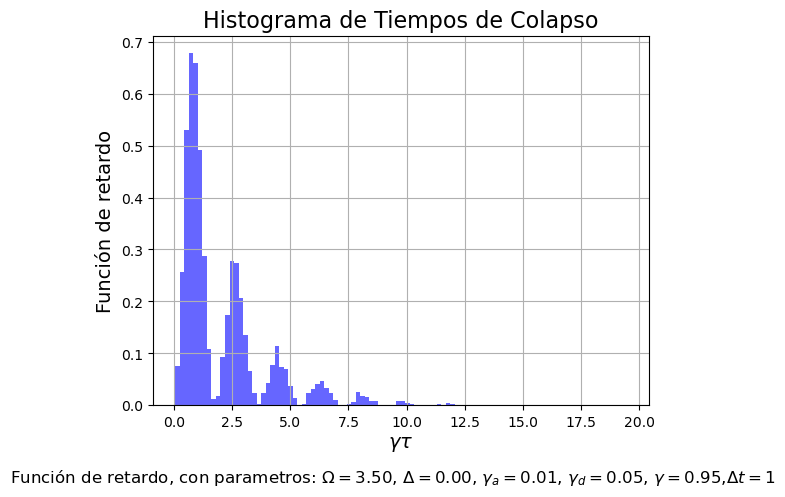

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
deltat=1
# Cargar el archivo collapse_times.csv desde la misma carpeta
df = pd.read_csv('collapse_times.csv')

# Extraer los tiempos de colapso
collapse_times = df['Tiempo de colapso']
print(max(collapse_times))
# Crear el histograma
plt.hist(collapse_times, bins=100, density=True, alpha=0.6, color='blue')
plt.xlabel(r"$\gamma \tau$", fontsize=14)
plt.ylabel("Función de retardo", fontsize=14)
plt.title("Histograma de Tiempos de Colapso", fontsize=16)
plt.figtext(0.5, -0.05, 
            r'Función de retardo, con parametros: '
            r'$\Omega = %.2f$, $\Delta = %.2f$, $\gamma_a = %.2f$, $\gamma_d = %.2f$, $\gamma = %.2f$,$\Delta t = %i$' % (Omega, Delta, ga, gd, g,deltat), 
            ha='center', fontsize=12)
plt.grid(True)
plt.show()
#